# Predict the mean of award for each type of contract in music and cultral events in 2027
## Overview
Nowadays, more and more people get used to the current situation that everyone will be positive in Covid-19. Although more and more people view Covid-19 similar as catching a cold, people are still suggested that we should take it seriously because infected with Covid-19 sometimes can be for more disturbing than a cold. I set this prediction because I want to predict in 2027, how many people will get infected, and whether we need to treat Covid-19 more seriously.
## Dataset
### Dataset Name
The dataset is about the covid-19 data from Bing starting 2020 to 2021. We'll use it to predict the number of confirmed, death, and recovered cases in 2027.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Some algorithms for predicting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [89]:
data = pd.read_csv("Downloads/bing_covid-19_data.csv", low_memory=False)

### Preprocess the dataset
We only care about the data which is in the region of the United States. To be more convenient in recognizing, we drop all non-numeric and irrelevant columns and set the report id as the index of any Covid-19 update. The reason that we drop those columns is mainly that we don't need the dates, latitude, longitude, or any other geometrical infomation to predict the trend or future of number of confirmed cases, death cases, or recovered cases. After that, we drop the rows that the changes of confirmed cases, death cases, and recovered cases are all zeros, because those data are redundant and only take up more time when building up the models. In the end of preprocessing, we replace all the nan with zeroes since no recover cases are reported at first. In addition, we reset the index because we need the id as x-axis of our plot.

In [93]:
data = data[(data[['country_region']] == 'United States').all(axis=1)]

data = data.drop(columns = ['updated','latitude','longitude','iso2','iso3','country_region','admin_region_1','iso_subdivision','admin_region_2','load_time'])

data.set_index("id", inplace = True)

In [96]:
# drop the rows with all 0's in change or null in confirmed_change
data = data[(np.isnan(data[['confirmed_change']]) == False).all(axis=1)]
data = data.loc[data['confirmed_change'] * data['deaths_change'] * data['recovered_change'] != 0]

In [97]:
data.reset_index()

,id,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change
0,339286,1,0.0,0.0,0.0,NaN,NaN
1,339287,2,1.0,0.0,0.0,NaN,NaN
2,339288,2,0.0,0.0,0.0,NaN,NaN
3,339289,5,3.0,0.0,0.0,NaN,NaN
4,339290,5,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2538473,208963556,1807,3.0,20.0,0.0,NaN,NaN
2538474,209110466,1807,0.0,21.0,1.0,NaN,NaN
2538475,209258819,1807,0.0,21.0,0.0,NaN,NaN
2538476,209406973,1807,0.0,21.0,0.0,NaN,NaN


After I've done the data cleaning steps, I'm going to visualize the data using scatterplot and more other kinds of plot to show whether Covid-19 will be serious in the future.

In [111]:
data = data.reset_index()

In [118]:
data

,id,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change
0,339286,1,0.0,0.0,0.0,NaN,NaN
1,339287,2,1.0,0.0,0.0,NaN,NaN
2,339288,2,0.0,0.0,0.0,NaN,NaN
3,339289,5,3.0,0.0,0.0,NaN,NaN
4,339290,5,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2538473,208963556,1807,3.0,20.0,0.0,NaN,NaN
2538474,209110466,1807,0.0,21.0,1.0,NaN,NaN
2538475,209258819,1807,0.0,21.0,0.0,NaN,NaN
2538476,209406973,1807,0.0,21.0,0.0,NaN,NaN


In [119]:
data.iloc[2538474]

id                  209110466.0
confirmed                1807.0
confirmed_change            0.0
deaths                     21.0
deaths_change               1.0
recovered                   NaN
recovered_change            NaN
Name: 2538474, dtype: float64

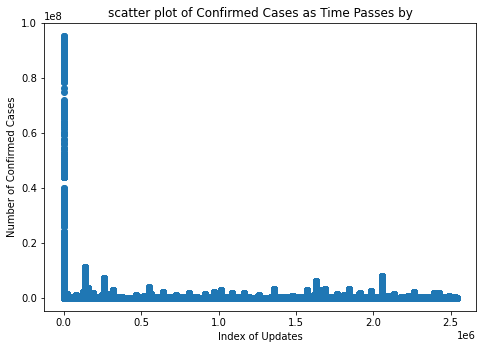

In [136]:
# confirmed cases
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x = data.index, y=data.confirmed.tolist())
ax.set_xlabel('Index of Updates')
ax.set_ylabel('Number of Confirmed Cases')
ax.set_title('scatter plot of Confirmed Cases as Time Passes by')
plt.show()

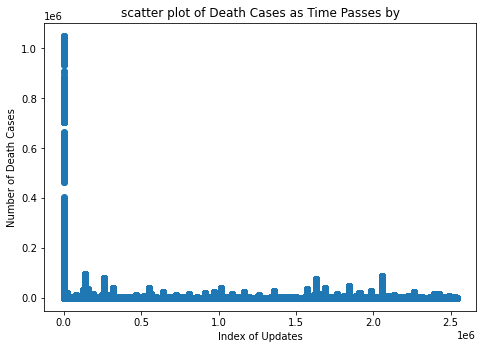

In [137]:
# deaths cases
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(x = data.index, y=data.deaths)
ax.set_xlabel('Index of Updates')
ax.set_ylabel('Number of Death Cases')
ax.set_title('scatter plot of Death Cases as Time Passes by')
plt.show()

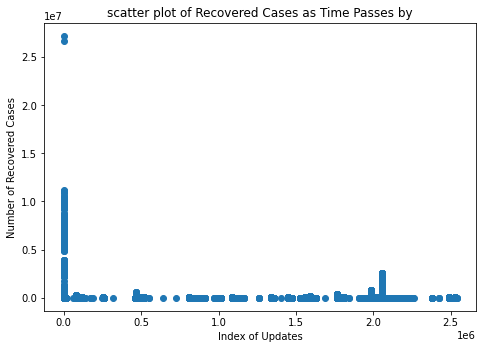

In [138]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x = data.index, y=data.recovered)
ax.set_xlabel('Index of Updates')
ax.set_ylabel('Number of Recovered Cases')
ax.set_title('scatter plot of Recovered Cases as Time Passes by')
plt.show()

We can see from the above that at first, all of confirmed, recovered, and death cases has skyrocket to a maximum (although there are some point missing in recovered cases due to lack of record, it's still not difficult to see the trend mentioned above). After that, the number of cases fluctuated in all three kinds of cases, but no longer reached so high. Above all, I think the number of cases in all three kinds are descending, and thus it's reasonable to do a linear regression model.

In [ ]:
reg = LinearRegression().fit([data.index],[data.confirmed])
y = reg.predict([data.confirmed])
fig, ax = plt.subplots()
plt.plot(data.index,y,c = 'darkblue')
ax.set_title('Linear regression of Confirmed Cases as Time Passes by')

In [ ]:
reg = LinearRegression().fit([data.index],[data.confirmed])
y = reg.predict([data.confirmed])
fig, ax = plt.subplots()
plt.plot(data.index,y,c = 'darkblue')
ax.set_title('Linear regression of Recovered Cases as Time Passes by')

In [ ]:
reg = LinearRegression().fit([data.index],[data.confirmed])
y = reg.predict([data.confirmed])
fig, ax = plt.subplots()
plt.plot(data.index,y,c = 'darkblue')
ax.set_title('Linear regression of Death Cases as Time Passes by')

There are some errors goes to my regression models and I have no idea of how to deal with it, but I will continue my pipeline below. Please forgive me of no figures and no more hypothesis testing because they all depend on the regression model.

## Conclusion
As time passes by, all of the Confirmed, Death, Recovered Cases are approaching zero or a steady trend. Therefore, we don't need to worry too much about Covid-19 in 2027. Always stay safe and healthy.